## Section 15: Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
#To get a glimpse of the data set
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
#To get information on the column types and number of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
# To get some statistics for each of the columns
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
# To get a list of the column names
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

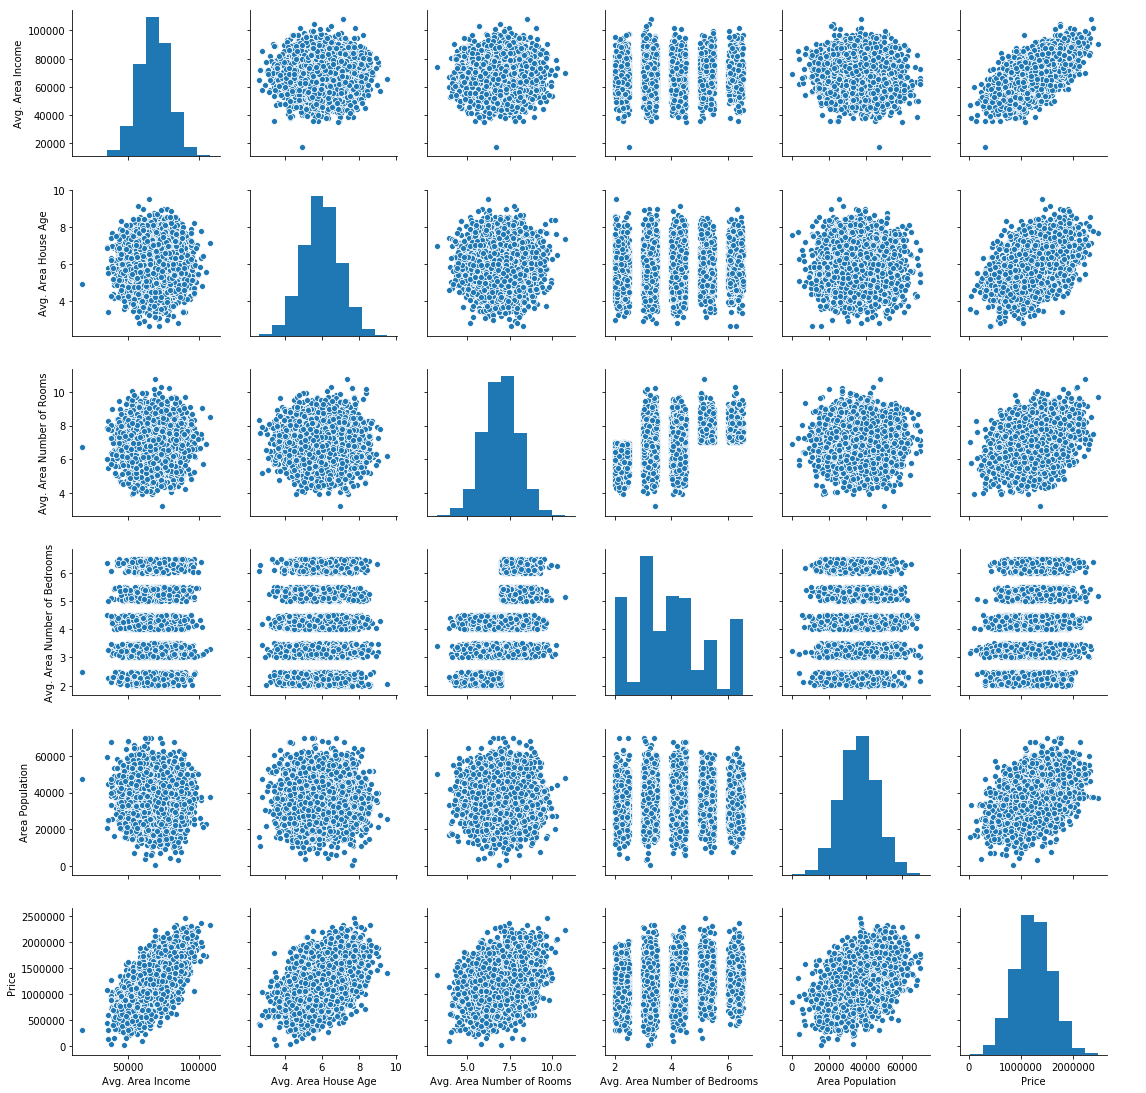

In [8]:
#Simple plots to check out the Data
#If the data isn't very very large, you can do Seaborn's pairplot
sns.pairplot(df)

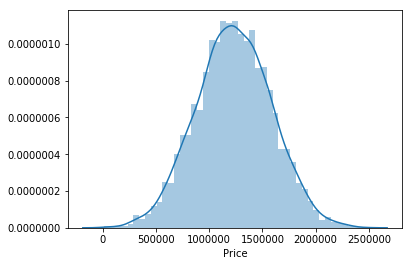

In [9]:
#Check the distribution of the Target column - in this case the price of the house
sns.distplot(df['Price'])

In [10]:
#Check the mean of the Target Column
df['Price'].mean()

1232072.65414236

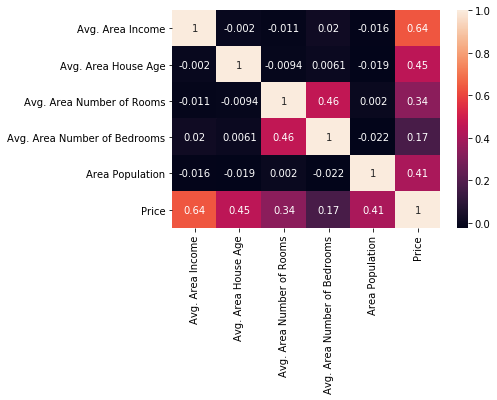

In [11]:
#Heatmap to visualize the correlations between each of the columns
sns.heatmap(df.corr(), annot = True)

In [12]:
#Time to Create X's and y's from the data set. 
#First we create the Xs by taking the columns from the dataset except for the address column as it's not very useful
#X variables are my features of the Machine Learning Model
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
#Now create y which is our Target variable i.e the variable we are trying to predict
y = df['Price']

In [14]:
#Now we need to create training sets and testing sets and we use scikit learn to do this
#import scikit learn

from sklearn.model_selection import train_test_split

In [15]:
X.shape

(5000, 5)

In [16]:
y.shape

(5000,)

In [17]:
#Split Training and Testing data - 60% Training and 40% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [18]:
#Import Linear Regression from Sci-kit Learn
from sklearn.linear_model import LinearRegression

In [19]:
#Instantiate a Linear Regression
lm = LinearRegression()

In [20]:
#Fit linear regression on the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#Evaluate the model by looking at the intercepts and coefficients
print(lm.intercept_)

-2640159.796851911


In [22]:
#Check the coefficients
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [23]:
#Create a dataframe of the coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])

In [24]:
cdf

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [25]:
#Now we do predictions from our test set
predictions = lm.predict(X_test)

In [26]:
#These are the predicted prices of the house.
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

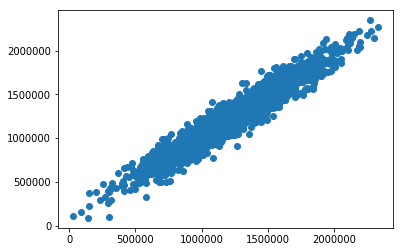

In [27]:
#Quick way to visualize the y test and predictions is to use a scatterplot 
plt.scatter(y_test, predictions)


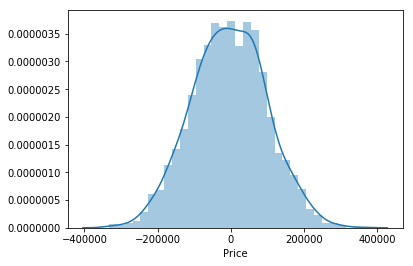

In [28]:
#Create a histogram of the distribution of our residuals
sns.distplot((y_test - predictions))

In [29]:
#Model Evalutation
#Import Relevent package
from sklearn import metrics

In [30]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914957

In [31]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209507

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291156

## Section 17: Logistic Regression

In [33]:
import numpy as np
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
train = pd.read_csv('titanic_train.csv')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


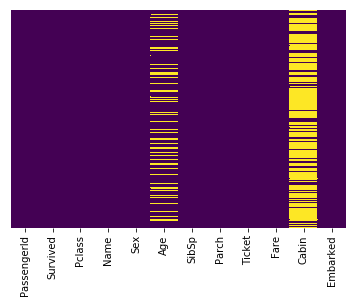

In [37]:
#create missing data viz using seaborn
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [38]:
sns.set_style('whitegrid')

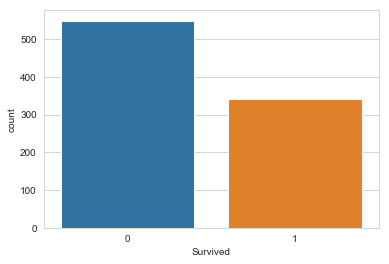

In [39]:
#visualize the ratio of the actual target labels
sns.countplot(x = 'Survived', data = train)

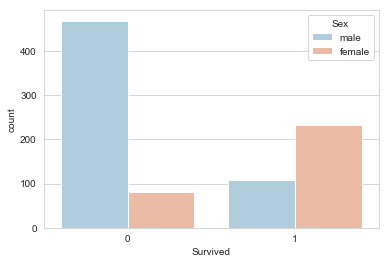

In [40]:
#survival with a hue of sex
#visualize the ratio of the actual target labels
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

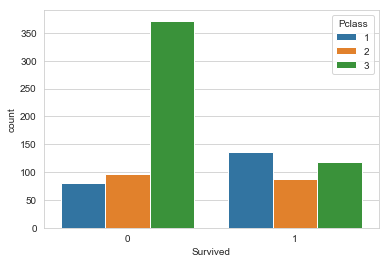

In [41]:
#Another Visualization with passenger Class
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

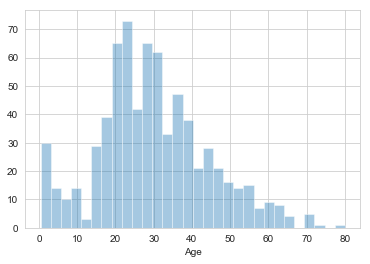

In [42]:
#Get an idea of the age of people on the Titanic
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

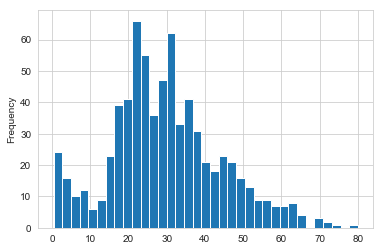

In [43]:
#Anotherway using Pandas
train['Age'].plot.hist(bins = 35)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


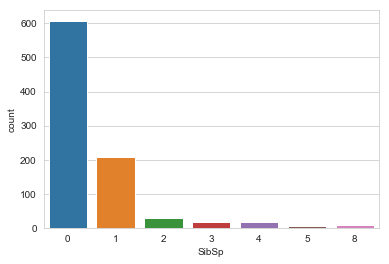

In [45]:
#Check out sibsp column
sns.countplot(x = 'SibSp', data = train)
#Most poeple on board didnt' have children or a spouse on board

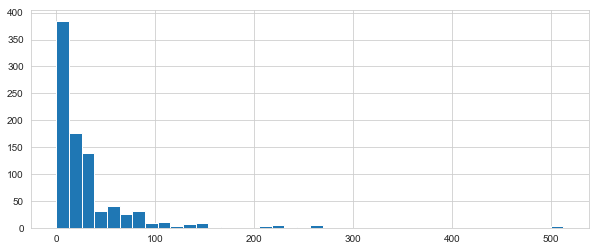

In [46]:
#lets take a look at the fare column
train['Fare'].hist(bins = 40, figsize = (10,4))

In [47]:
#produce same plots with cufflinks
import cufflinks as cf
cf.go_offline()

In [48]:
train['Fare'].iplot(kind = 'hist', bins = 40)

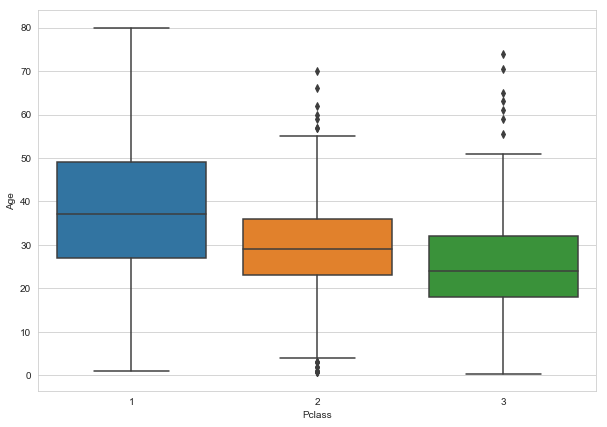

In [49]:
#Cleaning data
#missing data
#create boxplot with seaborn
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
#we are going to impute age using the passenger class

In [50]:
#create a function to impute age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [51]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

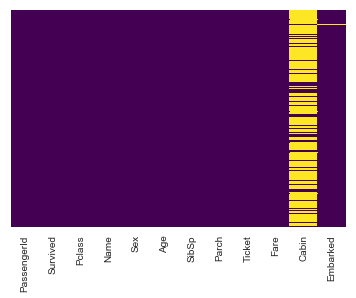

In [52]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [53]:
#Cabin information is missing - a lot of missing value so the column isn't usable.
train.drop('Cabin', axis = 1, inplace = True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


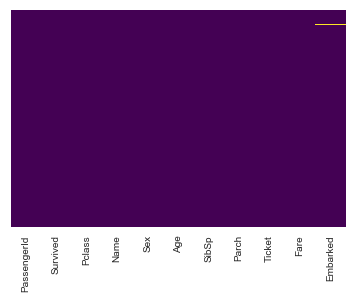

In [55]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [56]:
#drop the last missing value in Embarked
train.dropna(inplace = True)

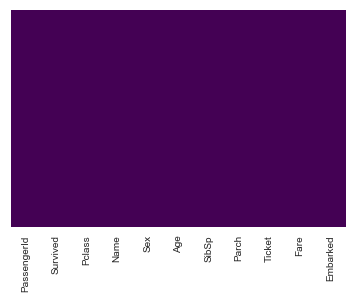

In [57]:
#Check the missing visualizations again
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [58]:
#Now we have to create dummy variables for categorical variables, sex and Embarked columns
#To create dummies for these
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [59]:
#similar thing for Embarked column
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [60]:
#add these columns to concatenate
train = pd.concat([train, sex, embark], axis = 1)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [62]:
#now we can delete sex, Embarked, Name, Ticket
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
train.drop('PassengerId', axis = 1, inplace = True)

In [65]:
#you can also convert the PClass feature into categories using pd.dummies. 

In [66]:
#Since there are two sets of train test data - you will need to do the same cleaning in test set. 

In [67]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [86]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Instantiate logistic Regression
logmodel = LogisticRegression()

In [ ]:
#fit in model
logmodel.fit(X_train, y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [87]:
#evaluate the model
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

In [88]:
#for confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

# Section 18: K Nearest Neighbors

In [ ]:
#best to classify annonymized Data
df = pd.read_csv('Classified Data', index_col = 0)

In [ ]:
df.head()

In [ ]:
#we have to standardize the data for this
from sklearn.preprocessing import StandardScaler

In [ ]:
#instantiate Scalar
scaler = StandardScaler()

In [ ]:
#fit the scaler target calss to the dataframe except for the Target Class
scaler.fit(df.drop('TARGET CLASS', axis = 1))

In [ ]:
#Now use the scaler object to do a transofrmation - to transform the data
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [ ]:
scaled_features

In [ ]:
#get all the column names from original df except for the last one
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [ ]:
#set X
X = df_feat

#set y
y = df['TARGET CLASS']

#do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Lets start with 1 as the number of neighbors and then use the elbow method to determine n_neighbors
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
#Now use the elbow method to choose correct k value
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
#plot thsi out
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#lets choose 17 from the graph
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)


#print the evaluation metrics again
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

### Section 19: Decision Trees and Random Forest

In [70]:
#Import Kyposis Data set
df = pd.read_csv('kyphosis.csv')

In [71]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


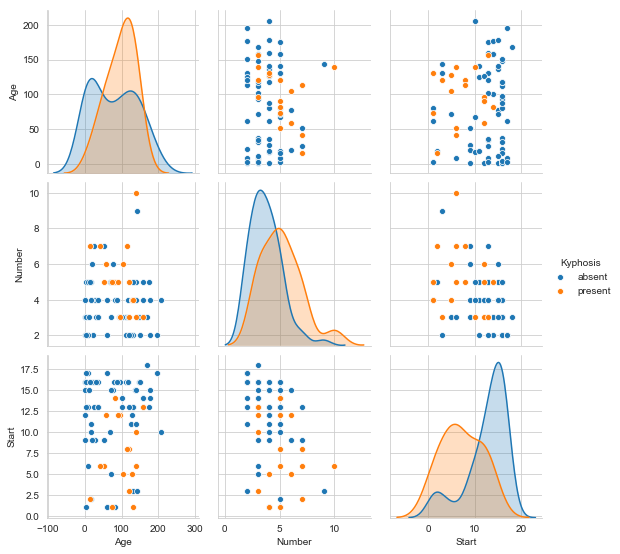

In [76]:
#data viz
sns.pairplot(df, hue = 'Kyphosis')

In [79]:
#set X data 
X = df.drop('Kyphosis', axis = 1)
#Set y data
y = df['Kyphosis']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [81]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtree = DecisionTreeClassifier()

In [83]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
predictions = dtree.predict(X_test)

In [89]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[13  4]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

   micro avg       0.60      0.60      0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



In [90]:
#now try random forest
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators = 200)

In [93]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
rfc_pred = rfc.predict(X_test)

In [95]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

   micro avg       0.76      0.76      0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [96]:
#imbalanced class in the target feature
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

### Section 20: Support Vector Machines

In [97]:
#Import data from sklearn library
from sklearn.datasets import load_breast_cancer

In [98]:
cancer = load_breast_cancer()

In [99]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [100]:
#setup a dataframe
df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [101]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [102]:
#train test split
X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [103]:
#Import support vector Classifier
from sklearn.svm import SVC

In [104]:
#Instantiate the Model
model = SVC()

In [105]:
model.fit(X_train, y_train)

C:\Tawsif\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [106]:
predictions = model.predict(X_test)

In [108]:
#the resuls should be very bad with default parameters
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[  0  66]
 [  0 105]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

   micro avg       0.61      0.61      0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



C:\Tawsif\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Tawsif\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Tawsif\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [110]:
#search for the best parameters using a gridsearch
from sklearn.model_selection import GridSearchCV

In [111]:
#GridSearch
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [113]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3)

In [114]:
grid.fit(X_train, y_train)

C:\Tawsif\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0

[CV] .... C=1000, gamma=0.001, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.9323308270676691, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.9166666666666666, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9097744360902256, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9699248120300752, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9318181818181818, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [115]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [117]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
grid_predictions = grid.predict(X_test)

In [119]:
print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions))

[[ 60   6]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

